# Import libaries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score,accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:

df = pd.read_csv("../additional_material/housing.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Clean Data

In [3]:
# Check how many missing values each column has
df.isna().sum().sort_values(ascending=False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [4]:
# Calculate percentage of missing values
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
missing_pct.head(20)


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Condition2       0.000000
dtype: float64

In [5]:
# Drop variables that have extremely high missing values
vars_to_drop = ["PoolQC", "MiscFeature", "Alley"]

df = df.drop(columns=vars_to_drop)

In [6]:
# Handle remaining missing values: 

# -----------------------------
# 1. Replace missing values with explicit categories
# -----------------------------

# Fence -> NoFence
df["Fence"] = df["Fence"].fillna("NoFence")

# MasVnrType -> None
df["MasVnrType"] = df["MasVnrType"].fillna("None")

# FireplaceQu -> NoFireplace
df["FireplaceQu"] = df["FireplaceQu"].fillna("NoFireplace")

# LotFrontage -> 0
# Comment: LotFrontage is numeric, so we fill with 0
df["LotFrontage"] = df["LotFrontage"].fillna(0)

# Garage-related variables -> NoGarage
garage_cols = [
    "GarageQual",
    "GarageFinish",
    "GarageType",
    "GarageYrBlt",
    "GarageCond"
]

for col in garage_cols:
    df[col] = df[col].fillna(0 if col == "GarageYrBlt" else "NoGarage")
  

# Basement-related variables -> NoBasement
basement_cols = [
    "BsmtFinType2",
    "BsmtExposure",
    "BsmtCond",
    "BsmtQual",
    "BsmtFinType1"
]

for col in basement_cols:
    df[col] = df[col].fillna("NoBasement")

# -----------------------------
# 2. Drop rows with missing values in specific columns
# -----------------------------

# Drop rows where MasVnrArea is missing
df = df.dropna(subset=["MasVnrArea"])

# Drop rows where Electrical is missing
df = df.dropna(subset=["Electrical"])


In [7]:
# Check again how many missing values each column has
df.isna().sum().sort_values(ascending=False).head(20)

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [8]:
# Check for duplicate rows
df.duplicated().sum()


np.int64(0)

# Inspect the target variable

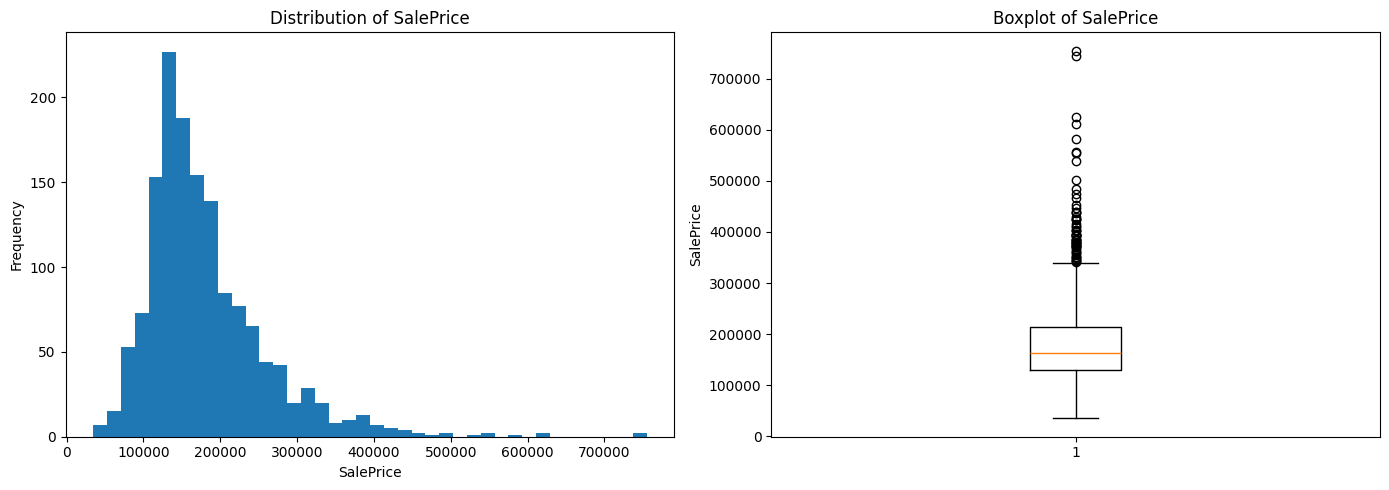

In [9]:
# Create a figure with two subplots (histogram + boxplot)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Histogram ---
axes[0].hist(df["SalePrice"], bins=40)
axes[0].set_title("Distribution of SalePrice")
axes[0].set_xlabel("SalePrice")
axes[0].set_ylabel("Frequency")

# --- Boxplot ---
# Boxplots help to detect outliers visually
axes[1].boxplot(df["SalePrice"], vert=True)
axes[1].set_title("Boxplot of SalePrice")
axes[1].set_ylabel("SalePrice")

plt.tight_layout()
plt.show()

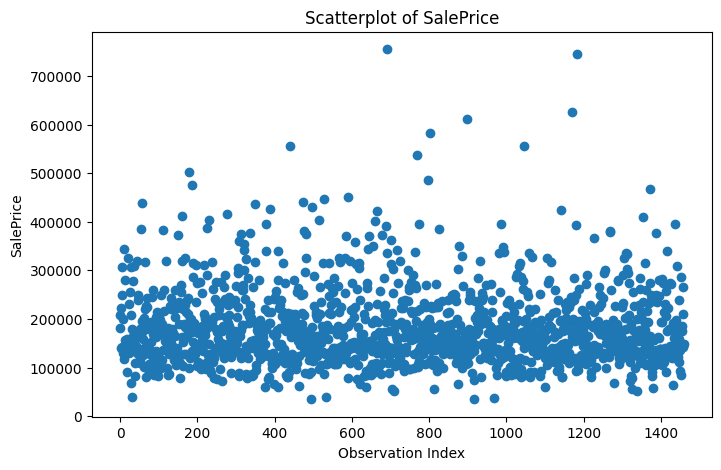

In [10]:


# Comment: Create a scatter plot of SalePrice against the observation index
plt.figure(figsize=(8, 5))

plt.scatter(df.index, df["SalePrice"])
plt.xlabel("Observation Index")
plt.ylabel("SalePrice")
plt.title("Scatterplot of SalePrice")

plt.show()


# Check for multicollonearity


## Numerical variables

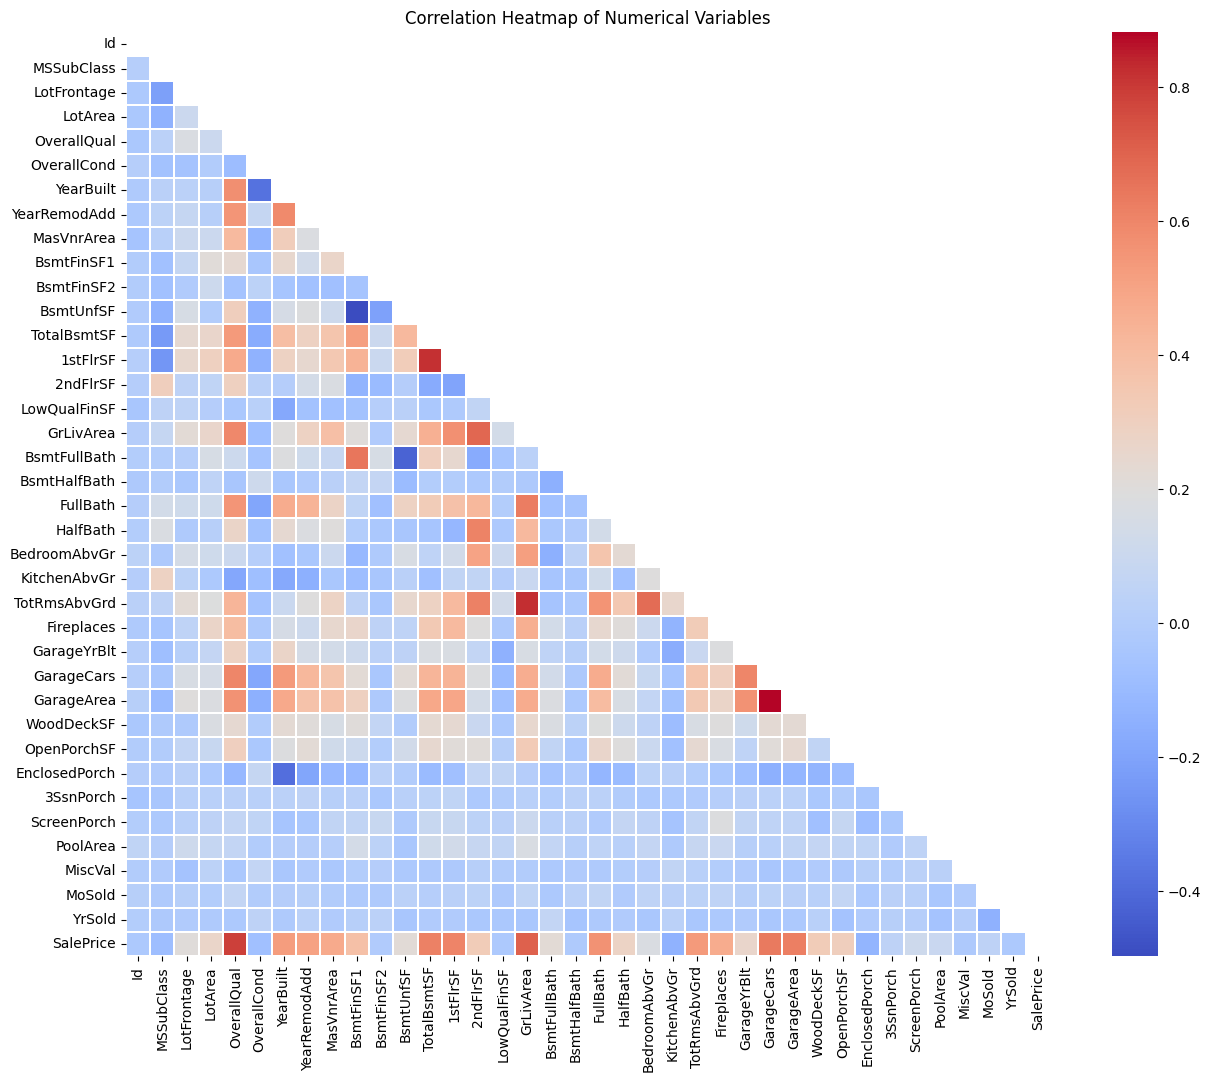

In [11]:


# --- Select only numerical columns ---
# Comment: This filters the dataframe to numeric variables only
numeric_df = df.select_dtypes(include=["int64", "float64"])

# --- Compute correlation matrix ---
corr_matrix = numeric_df.corr()

# --- Plot the heatmap ---
plt.figure(figsize=(16, 12))

# Comment: Using a mask hides the upper triangle of the heatmap to make it easier to read
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    square=True,
    linewidths=0.3
)

plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


## Exclude variables that have basically no correlation with SalePrice to pre-reduce the model

In [12]:


# --- Select only numeric columns ---
numeric_df = df.select_dtypes(include=["int64", "float64"])

# --- Compute Spearman correlation matrix ---
spearman_corr = numeric_df.corr(method="spearman")

# --- Extract correlations with SalePrice ---
saleprice_corr = (
    spearman_corr["SalePrice"]
    .drop("SalePrice")              # remove self-correlation
    .sort_values(ascending=False)   # sort by strength
)

saleprice_corr


OverallQual      0.809477
GrLivArea        0.731096
GarageCars       0.690073
YearBuilt        0.652576
GarageArea       0.648808
FullBath         0.635896
GarageYrBlt      0.633518
TotalBsmtSF      0.603145
1stFlrSF         0.576567
YearRemodAdd     0.570768
TotRmsAbvGrd     0.533715
Fireplaces       0.521201
OpenPorchSF      0.476978
LotArea          0.457572
MasVnrArea       0.421500
WoodDeckSF       0.355873
HalfBath         0.341811
BsmtFinSF1       0.299852
2ndFlrSF         0.294484
LotFrontage      0.238625
BedroomAbvGr     0.237407
BsmtFullBath     0.222735
BsmtUnfSF        0.185559
ScreenPorch      0.102026
MoSold           0.069500
3SsnPorch        0.066324
PoolArea         0.058939
MSSubClass       0.008619
BsmtHalfBath    -0.010623
Id              -0.020577
YrSold          -0.029375
BsmtFinSF2      -0.036965
MiscVal         -0.061938
LowQualFinSF    -0.067301
OverallCond     -0.126816
KitchenAbvGr    -0.167833
EnclosedPorch   -0.219356
Name: SalePrice, dtype: float64

## All variables with a correlation between -0.1 and 0.1 will be excluded as they are most likely very irrelevant

In [13]:
# Comment: Drop numeric predictors with weak Spearman correlation to SalePrice
threshold = 0.10

weak_vars = saleprice_corr[abs(saleprice_corr) < threshold].index.tolist()
weak_vars


['MoSold',
 '3SsnPorch',
 'PoolArea',
 'MSSubClass',
 'BsmtHalfBath',
 'Id',
 'YrSold',
 'BsmtFinSF2',
 'MiscVal',
 'LowQualFinSF']

In [14]:
# Comment: Remove weak numeric predictors from the dataframe
df = df.drop(columns=weak_vars)


In [15]:
print("Dropped variables (|spearman| < 0.10):", weak_vars)


Dropped variables (|spearman| < 0.10): ['MoSold', '3SsnPorch', 'PoolArea', 'MSSubClass', 'BsmtHalfBath', 'Id', 'YrSold', 'BsmtFinSF2', 'MiscVal', 'LowQualFinSF']


## Summarize high-correlating variables to further pre-simplify the model

In [16]:


# --- Select only numeric columns ---
numeric_df = df.select_dtypes(include=["int64", "float64"])

# --- Compute correlation matrix ---
corr_matrix = numeric_df.corr().abs()  # absolute value of correlations

# --- Find pairs with correlation > 0.8 ---
# Comment: We remove self-correlations using a mask
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()  # convert matrix to long format
    .reset_index()
)

# Rename columns for clarity
high_corr_pairs.columns = ["Variable_1", "Variable_2", "Correlation"]

# Filter for correlations above threshold
result = high_corr_pairs[high_corr_pairs["Correlation"] > 0.8]

result


,Variable_1,Variable_2,Correlation
207,TotalBsmtSF,1stFlrSF,0.818107
263,GrLivArea,TotRmsAbvGrd,0.825563
357,GarageCars,GarageArea,0.882470


## We will keep TotalBsmtSF, GrLivArea and GarageCars and dropp the respective other variables as the three we keep have higher correlations with SalePrice

In [17]:
# Comment: Drop redundant numerical variables based on lower correlation with SalePrice
vars_to_drop = [
    "1stFlrSF",
    "TotRmsAbvGrd",
    "GarageArea"
]

df = df.drop(columns=vars_to_drop)


## Correlation Heatmap with final numerical variables for the model

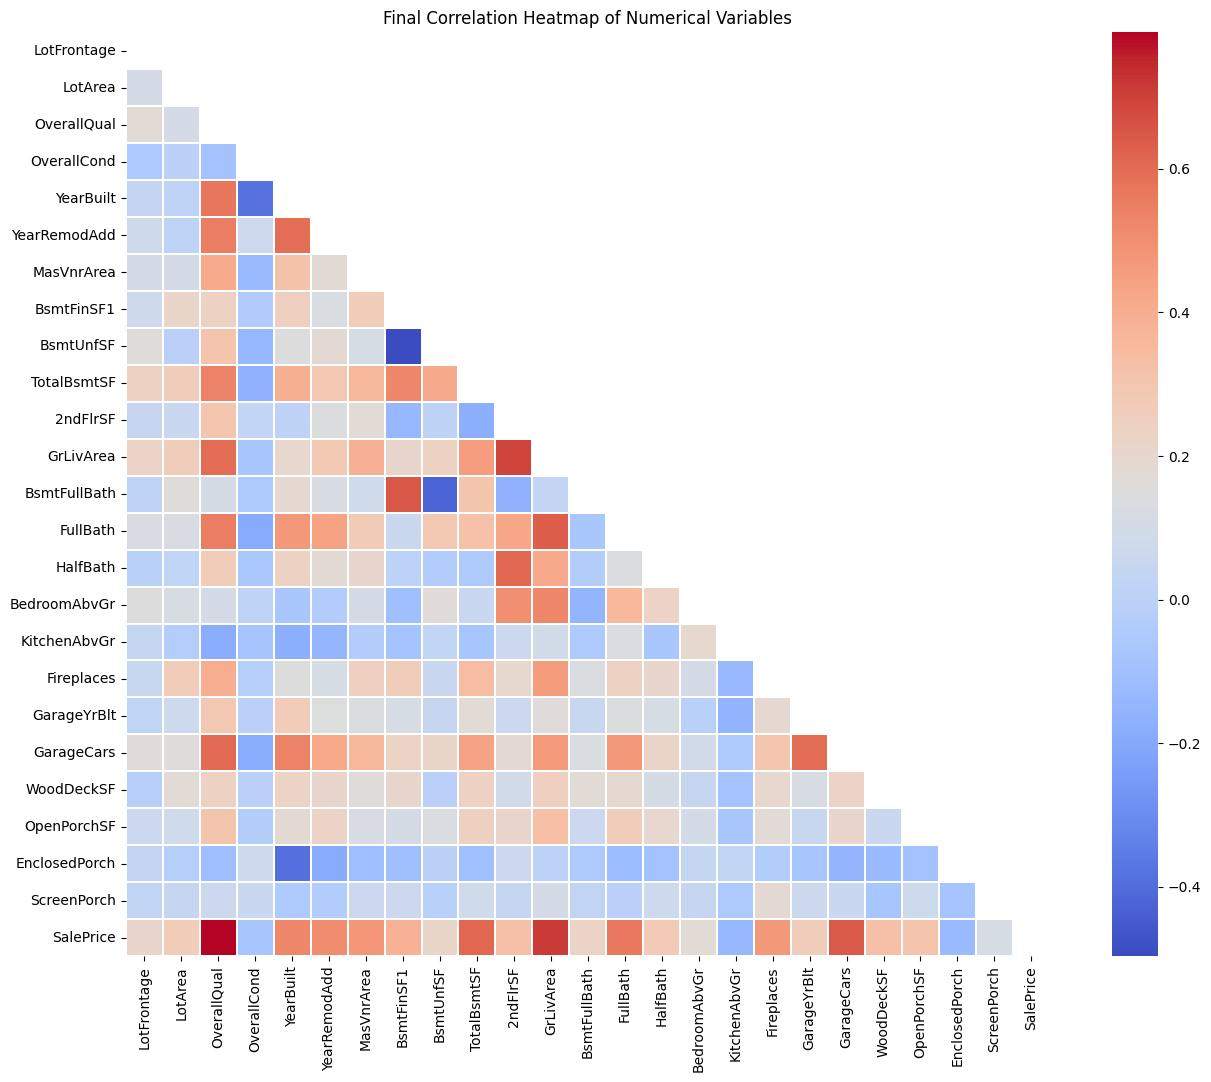

In [18]:
# --- Select final numerical variables ---
# Comment: Select only numerical columns after variable reduction
numeric_df_final = df.select_dtypes(include=["int64", "float64"])

# --- Compute correlation matrix ---
corr_matrix_final = numeric_df_final.corr()

# --- Create mask for upper triangle ---
mask = np.triu(np.ones_like(corr_matrix_final, dtype=bool))

# --- Plot heatmap ---
plt.figure(figsize=(16, 12))

sns.heatmap(
    corr_matrix_final,
    mask=mask,
    cmap="coolwarm",
    annot=False,
    linewidths=0.3,
    square=True
)

plt.title("Final Correlation Heatmap of Numerical Variables")
plt.show()


## Categorical variables

In [19]:


# Comment: Select categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

results = []

for col in cat_cols:
    # Comment: Calculate median SalePrice per category
    medians = df.groupby(col)["SalePrice"].median()
    
    # Comment: Use range of medians as a simple "impact" measure
    impact = medians.max() - medians.min()
    
    # Comment: Store number of categories and smallest group size (for balance check)
    value_counts = df[col].value_counts()
    min_group_size = value_counts.min()
    n_categories = value_counts.shape[0]
    
    results.append({
        "variable": col,
        "impact_median_range": impact,
        "n_categories": n_categories,
        "min_group_size": min_group_size
    })

cat_impact_df = pd.DataFrame(results).sort_values("impact_median_range", ascending=False)
cat_impact_df


,variable,impact_median_range,n_categories,min_group_size
17,ExterQual,279669.0,4,14
9,Condition2,228250.0,8,1
7,Neighborhood,226906.5,25,2
20,BsmtQual,215700.0,5,35
15,Exterior2nd,214000.0,16,1
29,KitchenQual,200500.0,4,39
13,RoofMatl,195500.0,8,1
14,Exterior1st,191000.0,15,1
31,FireplaceQu,182750.0,6,20
38,SaleType,153550.0,9,2


## One important problem is that some categories have extremely low values (n = 1). We will deal with this by creating a "other" variable to merge some of these together.

In [20]:
# Comment: Select categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

# Minimum number of observations per category
min_count = 5

for col in cat_cols:
    # Count category frequencies
    value_counts = df[col].value_counts()
    
    # Identify rare categories
    rare_categories = value_counts[value_counts < min_count].index
    
    # Replace rare categories with 'Other'
    df[col] = df[col].replace(rare_categories, "Other")


In [21]:
df[cat_cols].nunique().sort_values()


Street            2
Utilities         2
CentralAir        2
LandSlope         3
Condition2        3
PavedDrive        3
MasVnrType        4
LandContour       4
ExterQual         4
Heating           4
KitchenQual       4
Electrical        4
ExterCond         4
LotShape          4
GarageFinish      4
RoofMatl          5
HeatingQC         5
BsmtExposure      5
BsmtCond          5
BsmtQual          5
BldgType          5
Fence             5
LotConfig         5
MSZoning          5
GarageQual        5
RoofStyle         6
GarageCond        6
SaleCondition     6
FireplaceQu       6
Foundation        6
BsmtFinType2      7
BsmtFinType1      7
GarageType        7
Functional        7
SaleType          7
HouseStyle        8
Condition1        9
Exterior1st      11
Exterior2nd      13
Neighborhood     25
dtype: int64

## okay, now let us run the previous test again:

In [22]:
# Comment: Select categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

results = []

for col in cat_cols:
    # Comment: Calculate median SalePrice per category
    medians = df.groupby(col)["SalePrice"].median()
    
    # Comment: Use range of medians as a simple "impact" measure
    impact = medians.max() - medians.min()
    
    # Comment: Store number of categories and smallest group size (for balance check)
    value_counts = df[col].value_counts()
    min_group_size = value_counts.min()
    n_categories = value_counts.shape[0]
    
    results.append({
        "variable": col,
        "impact_median_range": impact,
        "n_categories": n_categories,
        "min_group_size": min_group_size
    })

cat_impact_df = pd.DataFrame(results).sort_values("impact_median_range", ascending=False)
cat_impact_df

,variable,impact_median_range,n_categories,min_group_size
17,ExterQual,279669.0,4,14
7,Neighborhood,226906.5,25,2
20,BsmtQual,215700.0,5,35
29,KitchenQual,200500.0,4,39
31,FireplaceQu,182750.0,6,20
13,RoofMatl,171000.0,5,4
39,SaleCondition,141589.0,6,4
14,Exterior1st,136000.0,11,7
15,Exterior2nd,134500.0,13,7
0,MSZoning,133200.0,5,10


## We will drop all variables with impact_median_range < 50.000 as they have lowest impact on SalePrice

In [23]:
# Comment: Define impact threshold
impact_threshold = 50000

# Comment: Identify low-impact categorical variables
low_impact_cats = cat_impact_df.loc[
    cat_impact_df["impact_median_range"] < impact_threshold,
    "variable"
].tolist()

low_impact_cats


['Street',
 'BldgType',
 'Fence',
 'LotConfig',
 'Condition2',
 'LandSlope',
 'Utilities']

<Figure size 800x400 with 0 Axes>

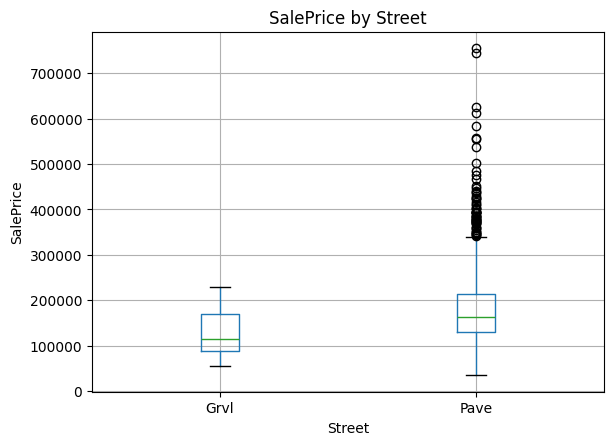

<Figure size 800x400 with 0 Axes>

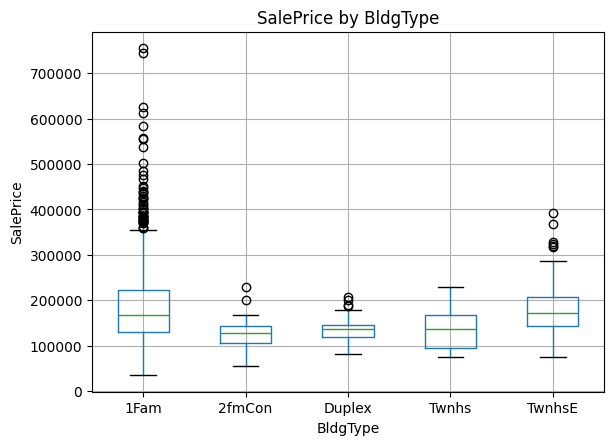

<Figure size 800x400 with 0 Axes>

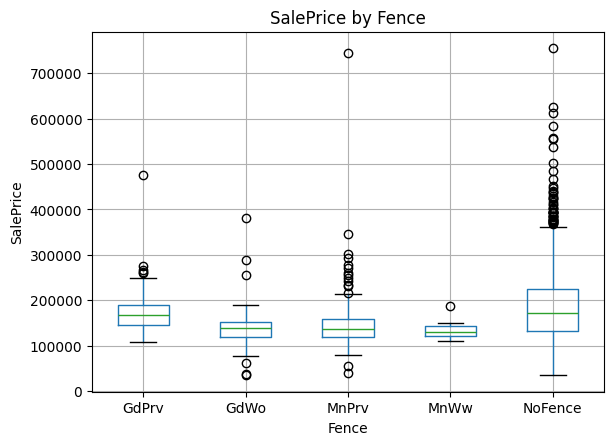

<Figure size 800x400 with 0 Axes>

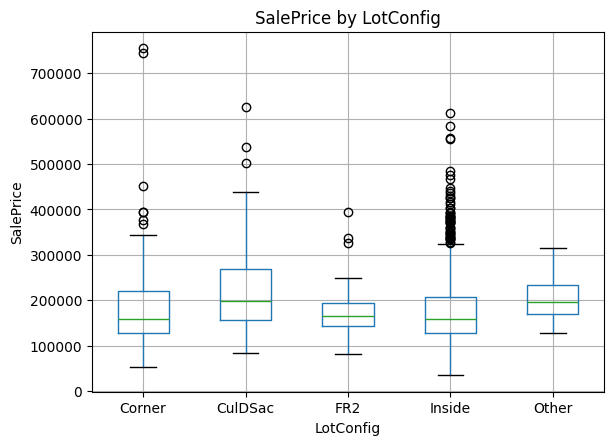

<Figure size 800x400 with 0 Axes>

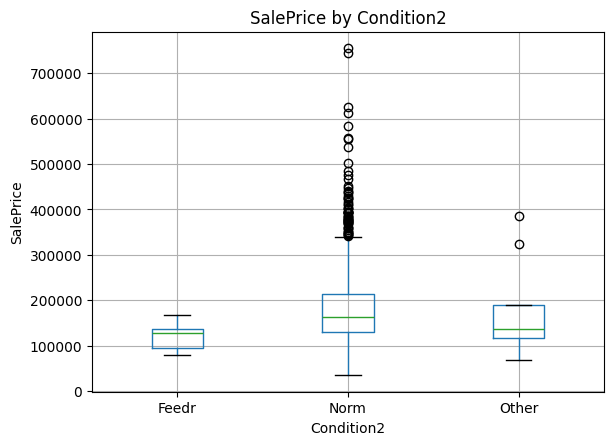

<Figure size 800x400 with 0 Axes>

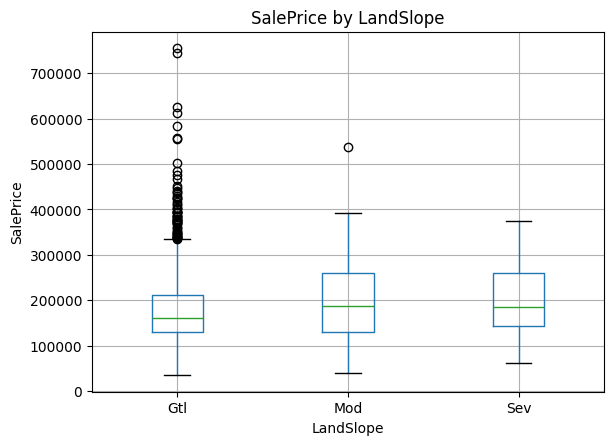

<Figure size 800x400 with 0 Axes>

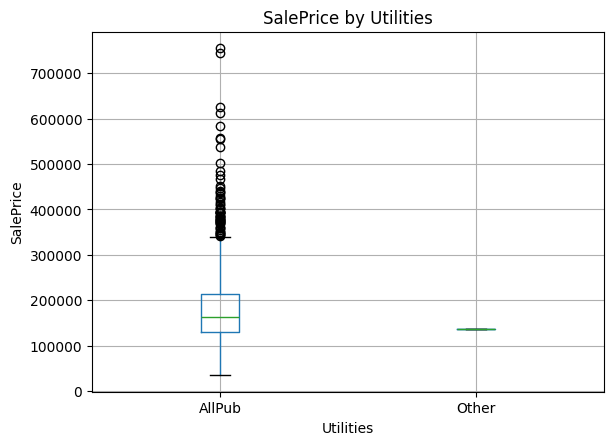

In [24]:

# Comment: Categorical variables to visually inspect before dropping
low_impact_vars = [
    "Street",
    "BldgType",
    "Fence",
    "LotConfig",
    "Condition2",
    "LandSlope",
    "Utilities"
]

# Comment: Create boxplots for each variable
for col in low_impact_vars:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        
        df.boxplot(column="SalePrice", by=col)
        
        plt.title(f"SalePrice by {col}")
        plt.suptitle("")  # remove automatic pandas subtitle
        plt.xlabel(col)
        plt.ylabel("SalePrice")
        
        plt.show()


In [25]:
print("Dropping categorical variables due to low impact:")
for var in low_impact_cats:
    print("-", var)


Dropping categorical variables due to low impact:
- Street
- BldgType
- Fence
- LotConfig
- Condition2
- LandSlope
- Utilities


In [26]:
# Comment: Drop low-impact categorical variables from the dataframe
df = df.drop(columns=low_impact_cats)


## Testing similar categorical variables whether some are redundandant

In [27]:
from scipy.stats import chi2_contingency
import itertools

def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.values.sum()
    r, k = confusion_matrix.shape
    # bias correction (optional but nice)
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / max(1e-12, min((kcorr-1), (rcorr-1))))

# --- Define "conceptual blocks" of variables (edit to match your remaining columns) ---
blocks = {
    "Garage": ["GarageType", "GarageFinish", "GarageQual", "GarageCond"],
    "Basement": ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"],
    "Exterior": ["ExterQual", "ExterCond", "Exterior1st", "Exterior2nd"],
    "Sale": ["SaleType", "SaleCondition"],
    "Location": ["Neighborhood", "MSZoning", "Condition1"]
}

results = []

for block_name, vars_list in blocks.items():
    # Keep only variables that still exist in df
    vars_list = [v for v in vars_list if v in df.columns]
    for v1, v2 in itertools.combinations(vars_list, 2):
        v = cramers_v(df[v1], df[v2])
        results.append({
            "block": block_name,
            "var1": v1,
            "var2": v2,
            "cramers_v": v
        })

assoc_df = pd.DataFrame(results).sort_values("cramers_v", ascending=False)
assoc_df


,block,var1,var2,cramers_v
21,Exterior,Exterior1st,Exterior2nd,0.805967
5,Garage,GarageQual,GarageCond,0.694993
0,Garage,GarageType,GarageFinish,0.684058
23,Location,Neighborhood,MSZoning,0.638900
3,Garage,GarageFinish,GarageQual,0.589221
4,Garage,GarageFinish,GarageCond,0.586312
8,Basement,BsmtQual,BsmtFinType1,0.576154
6,Basement,BsmtQual,BsmtCond,0.526478
13,Basement,BsmtExposure,BsmtFinType1,0.521819
7,Basement,BsmtQual,BsmtExposure,0.520763


In [28]:
assoc_df[assoc_df["cramers_v"] >= 0.60]


,block,var1,var2,cramers_v
21,Exterior,Exterior1st,Exterior2nd,0.805967
5,Garage,GarageQual,GarageCond,0.694993
0,Garage,GarageType,GarageFinish,0.684058
23,Location,Neighborhood,MSZoning,0.638900


## We will drop one of the variables of each pair, as they are very redundandent. We will keep the variables that are easier to understand and more relevant for house buyers.

In [29]:
# Comment: Drop redundant categorical variables based on Cramer's V analysis
vars_to_drop = [
    "Exterior2nd",
    "GarageCond",
    "GarageFinish",
    "MSZoning"
]

df = df.drop(columns=vars_to_drop)


# Inspect final dataset

In [30]:
df.shape

(1451, 54)

In [31]:
# Comment: Descriptive statistics for numerical variables
df.describe()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,57.624397,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,567.197105,1056.310131,...,2.866988,1.046175,0.612681,1867.914542,1.764990,94.412819,46.422467,21.952447,15.154376,180624.101999
std,34.655808,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,442.209192,437.914609,...,0.815086,0.219571,0.643443,454.981043,0.748728,125.436852,66.060150,61.108223,55.917522,79312.128273
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,222.000000,795.000000,...,2.000000,1.000000,0.000000,1958.000000,1.000000,0.000000,0.000000,0.000000,0.000000,129900.000000
50%,63.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,479.000000,991.000000,...,3.000000,1.000000,1.000000,1977.000000,2.000000,0.000000,24.000000,0.000000,0.000000,162500.000000
75%,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,808.000000,1297.500000,...,3.000000,1.000000,1.000000,2001.000000,2.000000,168.000000,68.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,2336.000000,6110.000000,...,8.000000,3.000000,3.000000,2010.000000,4.000000,857.000000,547.000000,552.000000,480.000000,755000.000000


In [32]:
# Comment: Descriptive statistics for categorical variables
df.select_dtypes(include=["object", "category"]).describe()

,LotShape,LandContour,Neighborhood,Condition1,HouseStyle,RoofStyle,RoofMatl,Exterior1st,MasVnrType,ExterQual,...,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageQual,PavedDrive,SaleType,SaleCondition
count,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,...,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451
unique,4,4,25,9,8,6,5,11,4,4,...,2,4,4,7,6,7,5,3,7,6
top,Reg,Lvl,NAmes,Norm,1Story,Gable,CompShg,VinylSd,None,TA,...,Y,SBrkr,TA,Typ,NoFireplace,Attchd,TA,Y,WD,Normal
freq,918,1302,225,1251,721,1133,1425,509,863,905,...,1356,1326,734,1352,685,863,1302,1331,1261,1193


In [33]:
# Comment: Final missing value check
df.isna().sum().sort_values(ascending=False)

LotFrontage      0
LotArea          0
LotShape         0
LandContour      0
Neighborhood     0
Condition1       0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageCars       0
GarageQual       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
SaleType         0
SaleConditio

# Export final dataset

In [34]:
# Comment: Export final dataset to Excel
df.to_excel("Group1_housing.xlsx", index=False)


# Until here part of Daniel

# Start Building  GLM Gaussian model for prediction 

In [35]:
X = df.drop(columns=['SalePrice']) # drop target variable
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split data into training and test sets
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1160, 53)
Test set size: (291, 53)


In [36]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns #select categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns #select numeric columns

print("Categorical:", list(categorical_cols))
print("Numeric:", list(numeric_cols))


Categorical: ['LotShape', 'LandContour', 'Neighborhood', 'Condition1', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']
Numeric: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


In [37]:
X_train_enc = pd.get_dummies(X_train,columns=categorical_cols,drop_first=True) # encode categorical variables for training set

X_test_enc = pd.get_dummies(X_test,columns=categorical_cols,drop_first=True) # encode categorical variables for test set


In [38]:
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns,fill_value=0) # align test set columns to training set

In [39]:
X_train_enc = X_train_enc.astype(float) # convert to float
X_test_enc = X_test_enc.astype(float) 

y_train = y_train.astype(float)
y_test = y_test.astype(float)


In [40]:
X_train_enc = X_train_enc.fillna(0) # fill any remaining missing values with 0
X_test_enc = X_test_enc.fillna(0) 


In [41]:
X_train_enc = sm.add_constant(X_train_enc) # add constant term for intercept
X_test_enc = sm.add_constant(X_test_enc)


In [42]:
glm_full = sm.GLM(
    y_train,
    X_train_enc,
    family=sm.families.Gaussian()
).fit() # fit the GLM model

print(glm_full.summary())
glm_full.aic #Akaike Information Criterion(AIC) Value for our model 


                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1160
Model:                            GLM   Df Residuals:                      988
Model Family:                Gaussian   Df Model:                          171
Link Function:               Identity   Scale:                      8.0593e+08
Method:                          IRLS   Log-Likelihood:                -13447.
Date:                Tue, 23 Dec 2025   Deviance:                   7.9626e+11
Time:                        23:01:28   Pearson chi2:                 7.96e+11
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9992
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

np.float64(27238.48048875417)

#### The above full model included a large number of predictors (171) and achieved an almost perfect fit (R-squ = 0.99)to the training data. However, this result reflects overfitting rather than genuine explanatory power. Many predictors were statistically insignificant, indicating redundancy and multicollinearity. Therefore, the model was systematically reduced to a minimum adequate model using an information-criterion-based approach.

In [43]:
null_model = sm.GLM(y_train, np.ones(len(y_train)),
                    family=sm.families.Gaussian()).fit()
null_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              SalePrice   No. Observations:                 1160
Model:                            GLM   Df Residuals:                     1159
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                      6.4689e+09
Method:                          IRLS   Log-Likelihood:                -14748.
Date:                Tue, 23 Dec 2025   Deviance:                   7.4974e+12
Time:                        23:01:28   Pearson chi2:                 7.50e+12
No. Iterations:                     3   Pseudo R-squ. (CS):          3.718e-07
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.808e+05   2361.489     76.555      0.000    1.76e+05    1.85e+05
==============================================================================
"""

In [44]:
glm_full.aic, null_model.aic

(np.float64(27238.48048875417), np.float64(29497.65111056388))

# Model reduction approach  using AIC

In [45]:
def fit_glm_aic(X, y):
    return sm.GLM(y, X, family=sm.families.Gaussian()).fit().aic

In [46]:
current_X = X_train_enc.copy() # here i used Backward AIC reduction (conceptual algorithm)
current_aic = fit_glm_aic(current_X, y_train)

improved = True

while improved:
    improved = False
    aic_with_removal = []

    for col in current_X.columns:
        X_temp = current_X.drop(columns=[col])
        try:
            aic = fit_glm_aic(X_temp, y_train)
            aic_with_removal.append((col, aic))
        except:
            continue

    best_col, best_aic = min(aic_with_removal, key=lambda x: x[1])

    if best_aic < current_aic:
        current_X = current_X.drop(columns=[best_col])
        current_aic = best_aic
        print(f"Removed {best_col}, new AIC = {current_aic:.2f}")
        improved = True


Removed BsmtFinType1_GLQ, new AIC = 27236.48
Removed BsmtFinSF1, new AIC = 27234.48
Removed Neighborhood_NWAmes, new AIC = 27232.48
Removed PavedDrive_Y, new AIC = 27230.49
Removed ExterCond_TA, new AIC = 27228.50
Removed ExterCond_Other, new AIC = 27226.51
Removed Heating_GasW, new AIC = 27224.53
Removed Neighborhood_Sawyer, new AIC = 27222.54
Removed Electrical_FuseF, new AIC = 27220.56
Removed Foundation_Stone, new AIC = 27218.59
Removed HouseStyle_2.5Unf, new AIC = 27216.61
Removed HeatingQC_Fa, new AIC = 27214.65
Removed Heating_Grav, new AIC = 27212.68
Removed Neighborhood_SWISU, new AIC = 27210.73
Removed OpenPorchSF, new AIC = 27208.77
Removed SaleType_ConLw, new AIC = 27206.85
Removed Condition1_Other, new AIC = 27204.94
Removed BsmtFinType1_Rec, new AIC = 27203.04
Removed BsmtFinType2_GLQ, new AIC = 27201.14
Removed BsmtUnfSF, new AIC = 27199.24
Removed BsmtFinType1_BLQ, new AIC = 27197.39
Removed Electrical_Other, new AIC = 27195.54
Removed Condition1_PosA, new AIC = 27193.7

# Final model(adequate model) after stepwise selection

In [47]:
final_model = sm.GLM(
    y_train,
    current_X,
    family=sm.families.Gaussian()
).fit()

print(final_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1160
Model:                            GLM   Df Residuals:                     1081
Model Family:                Gaussian   Df Model:                           78
Link Function:               Identity   Scale:                      7.7493e+08
Method:                          IRLS   Log-Likelihood:                -13477.
Date:                Tue, 23 Dec 2025   Deviance:                   8.3770e+11
Time:                        23:18:15   Pearson chi2:                 8.38e+11
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9994
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4

#### Model reduction was performed using an Akaike Information Criterion (AIC). Starting from a full Gaussian GLM, predictors were removed iteratively using backward elimination. At each step, a predictor was excluded only if its removal resulted in a lower AIC, indicating an improved balance between model fit and complexity. The reduction process stopped when no further improvement in AIC was possible. The final minimum adequate model was subsequently compared to a null model and showed substantially better fit.In this model 78 values can correctly predict the sale prices as previously achieved through full model , with 171 columns.

## Plots 

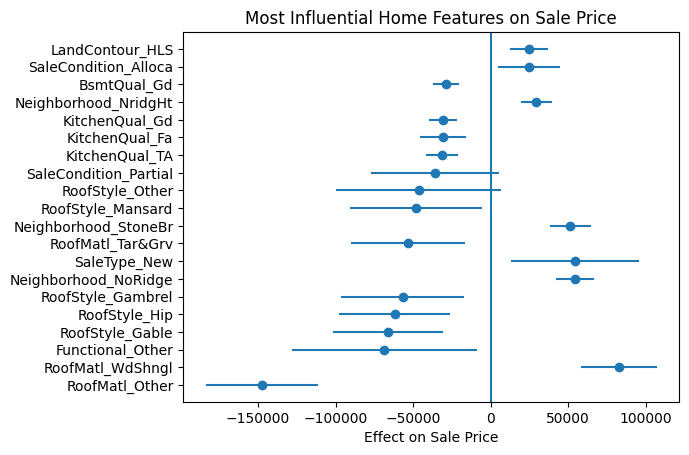

In [48]:
params = final_model.params
conf = final_model.conf_int()

coef_df = pd.DataFrame({
    "coef": params,
    "lower": conf[0],
    "upper": conf[1]
})

# Remove intercept
coef_df = coef_df.drop("const")

# Take top effects by absolute size
top = coef_df.reindex(
    coef_df["coef"].abs().sort_values(ascending=False).head(20).index
)

plt.figure()
plt.errorbar(
    top["coef"],
    top.index,
    xerr=[top["coef"] - top["lower"], top["upper"] - top["coef"]],
    fmt='o'
)
plt.axvline(0)
plt.xlabel("Effect on Sale Price")
plt.title("Most Influential Home Features on Sale Price")
plt.show()


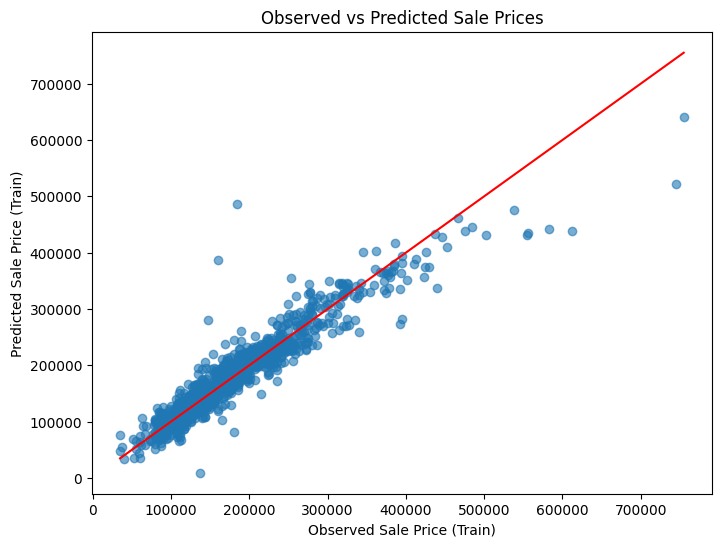

In [83]:
# Use the reduced training features used to fit the final model (current_X) and the training target (y_train)
y_pred_train = final_model.predict(current_X)

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel("Observed Sale Price (Train)")
plt.ylabel("Predicted Sale Price (Train)")
plt.title("Observed vs Predicted Sale Prices")
plt.show()


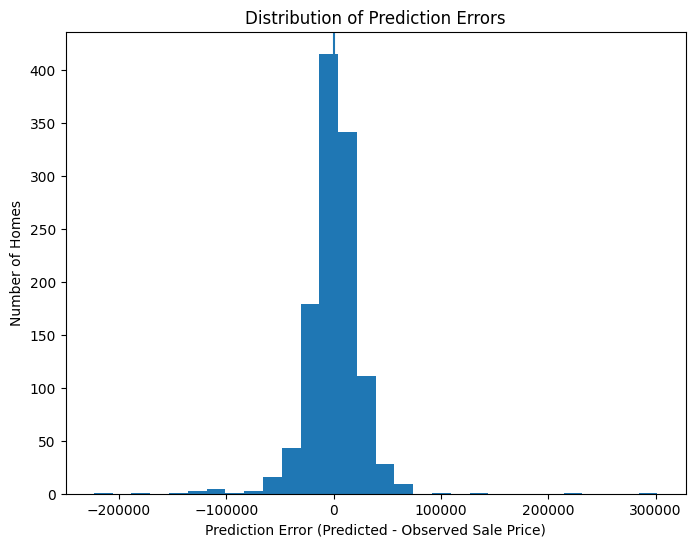

In [84]:
# Compute residuals
residuals = y_pred_train - y_train

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.axvline(0)
plt.xlabel("Prediction Error (Predicted - Observed Sale Price)")
plt.ylabel("Number of Homes")
plt.title("Distribution of Prediction Errors")
plt.show()


#### Most prediction errors are concentrated around zero, indicating that the model generally predicts sale prices close to their observed values. Larger errors occur less frequently and are mainly associated with very high-priced homes.

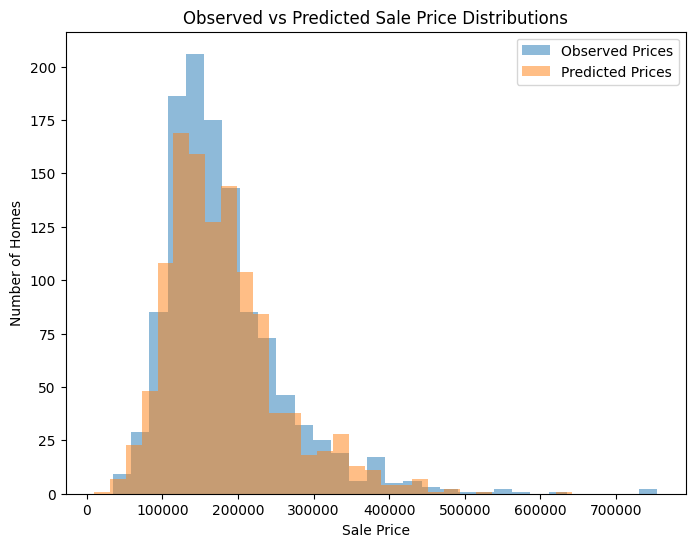

In [85]:
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=30, alpha=0.5, label="Observed Prices")
plt.hist(y_pred_train, bins=30, alpha=0.5, label="Predicted Prices")
plt.xlabel("Sale Price")
plt.ylabel("Number of Homes")
plt.title("Observed vs Predicted Sale Price Distributions")
plt.legend()
plt.show()


# Comparing Null model and Final model AIC Value 

In [52]:
X_null = np.ones((len(y_train), 1))

null_model = sm.GLM(
    y_train,
    X_null,
    family=sm.families.Gaussian()
).fit()

print("Null AIC:", null_model.aic)
print("Final AIC:", final_model.aic)


Null AIC: 29497.65111056388
Final AIC: 27111.33442998786


# Testing on data not used in training

In [53]:
model_cols = final_model.model.exog_names
model_cols

['const',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'LotShape_IR2',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Norm',
 'Condition1_PosN',
 'Condition1_RRAn',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2Story',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Other',
 'RoofMatl_Other',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st

In [54]:
X_test_reduced = X_test_enc.reindex(
    columns=model_cols,
    fill_value=0
)

In [55]:
y_test_pred = final_model.predict(X_test_reduced)

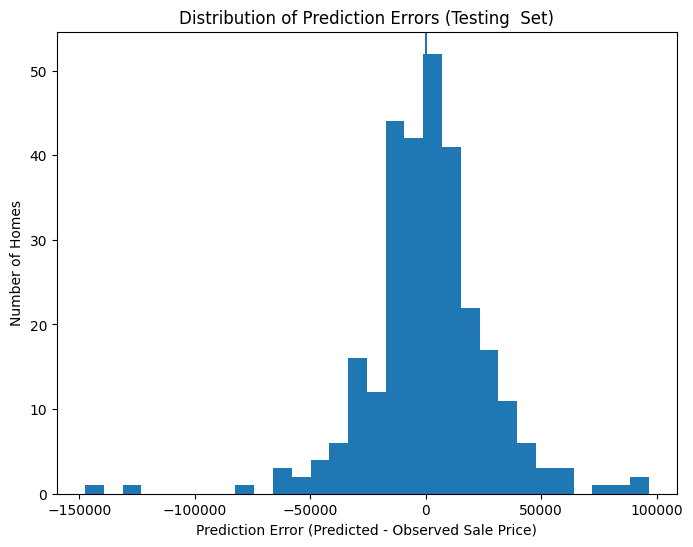

In [56]:
residuals = y_test_pred - y_test

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.axvline(0)
plt.xlabel("Prediction Error (Predicted - Observed Sale Price)")
plt.ylabel("Number of Homes")
plt.title("Distribution of Prediction Errors (Testing  Set)")
plt.show()

In [57]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Root mean squared Error : {rmse}\nMean Squared Error: {mae}\nR2 Score: {r2}")

Root mean squared Error : 26479.23820750011
Mean Squared Error: 18369.641551673
R2 Score: 0.8743246896574208


# Using  Second Approach Random Forest for Prediction 

In [58]:
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns

preprocessor = ColumnTransformer([
    ("num", "passthrough", numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [59]:
rf_model = RandomForestRegressor(
    n_estimators=500,  # number of trees
    max_depth=None,    # grow trees until pure or min samples split
    random_state=42,
    n_jobs=-1          # use all cores
)


In [60]:
rf_model.fit(X_train_processed, y_train)
rf_model.score(X_train_processed, y_train) # training accuracy

0.9803960126987185

In [61]:
y_pred_rf = rf_model.predict(X_test_processed) # Testing Accuracy
rf_model.score(X_test_processed, y_test)

0.9162481172283731

In [62]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"\nRMSE: {rmse}, \nMAE: {mae}, \nR²: {r2}")



RMSE: 21616.122498248318, 
MAE: 14910.581989199807, 
R²: 0.9162481172283731


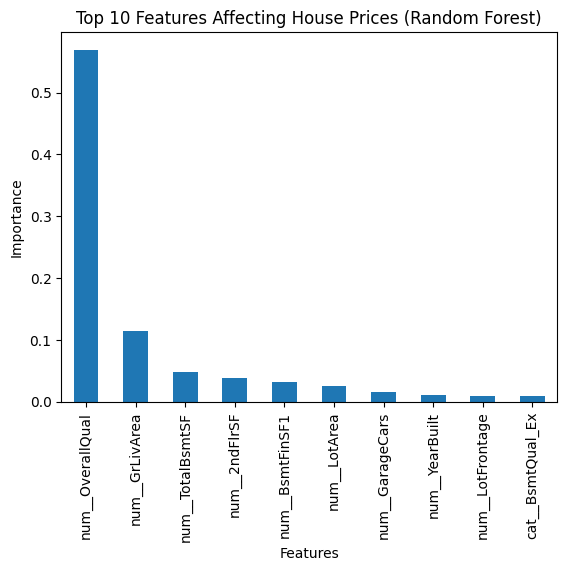

In [63]:
feat_importances = pd.Series(rf_model.feature_importances_, index=preprocessor.get_feature_names_out())
top_feats = feat_importances.sort_values(ascending=False).head(10)

top_feats.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Top 10 Features Affecting House Prices (Random Forest)")
plt.show()


# my part (Ranjit) is done here

# Creating Some intuitive plots  about data (SHREYAS KRISHNAMURTHY)

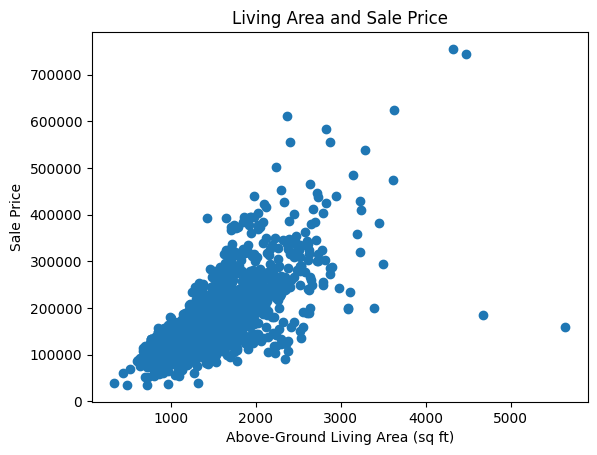

In [64]:
x = df["GrLivArea"]
y = df["SalePrice"]

plt.figure()
plt.scatter(x, y)
plt.xlabel("Above-Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.title("Living Area and Sale Price")
plt.show()


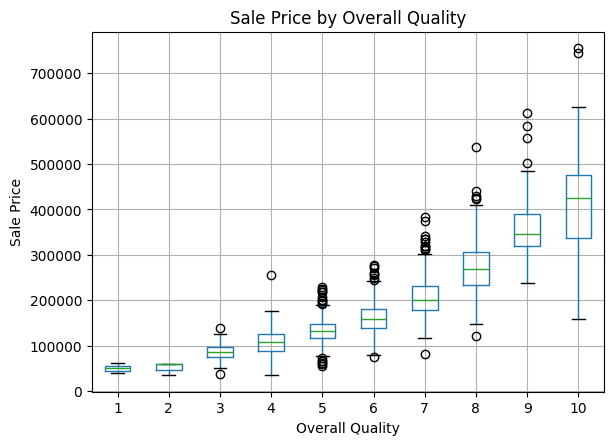

In [65]:
df.boxplot(column="SalePrice", by="OverallQual")
plt.title("Sale Price by Overall Quality")
plt.suptitle("")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()


####  Above plot shows that : Houses with higher overall quality consistently sell for more.

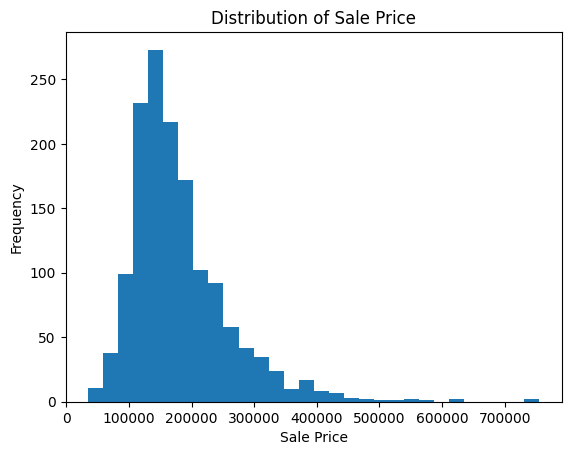

In [66]:
plt.figure()
plt.hist(df["SalePrice"], bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sale Price")
plt.show()


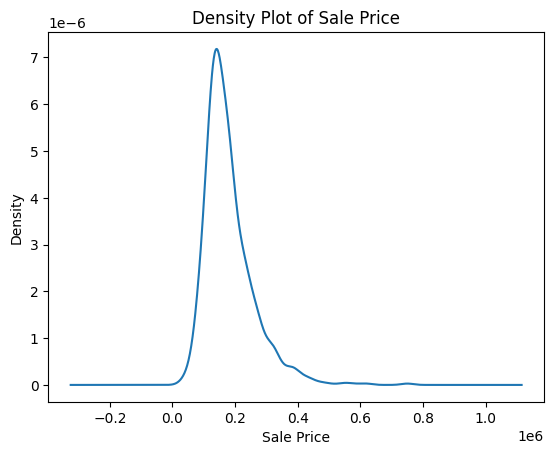

In [67]:
plt.figure()
df["SalePrice"].plot(kind="kde")
plt.xlabel("Sale Price")
plt.title("Density Plot of Sale Price")
plt.show()


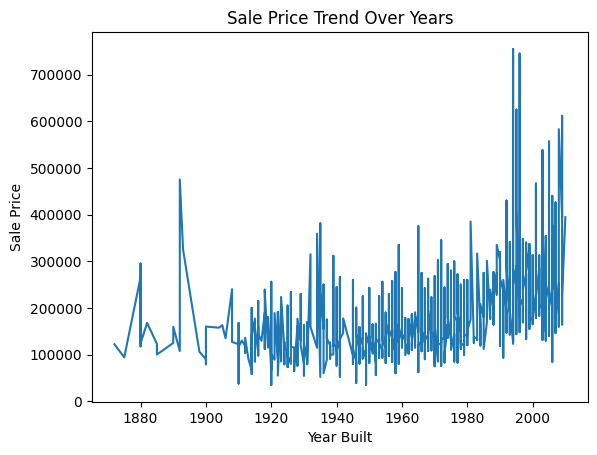

In [68]:
df_sorted = df.sort_values("YearBuilt")

plt.figure()
plt.plot(df_sorted["YearBuilt"], df_sorted["SalePrice"])
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.title("Sale Price Trend Over Years")
plt.show()


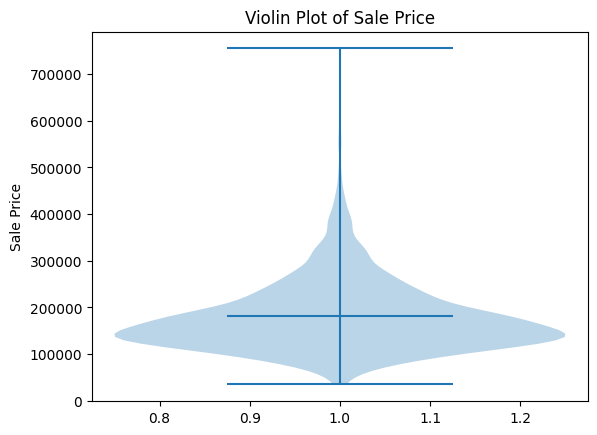

In [69]:
plt.figure()
plt.violinplot(df["SalePrice"], showmeans=True)
plt.ylabel("Sale Price")
plt.title("Violin Plot of Sale Price")
plt.show()


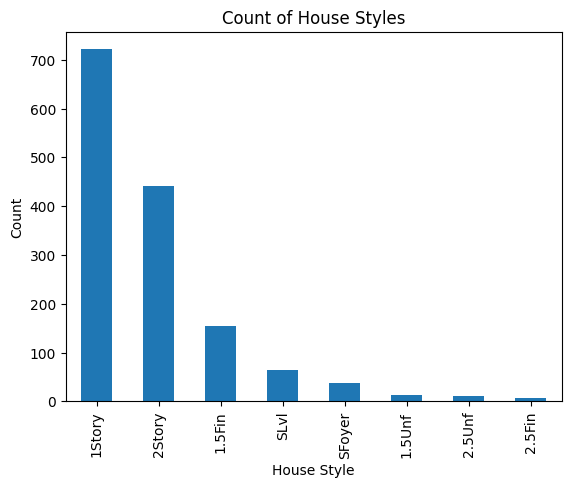

In [70]:
df["HouseStyle"].value_counts().plot(kind="bar")
plt.xlabel("House Style")
plt.ylabel("Count")
plt.title("Count of House Styles")
plt.show()


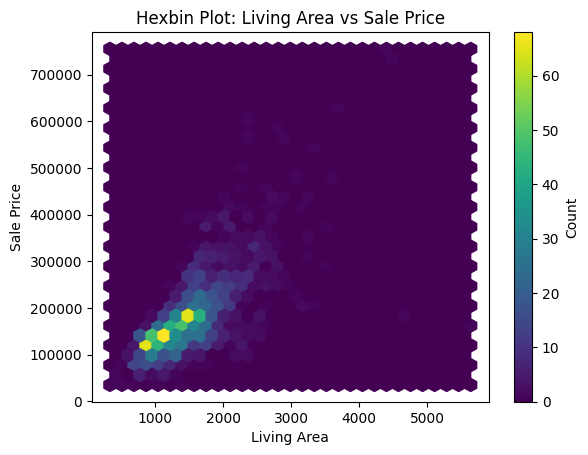

In [71]:
plt.figure()
plt.hexbin(df["GrLivArea"], df["SalePrice"], gridsize=30)
plt.xlabel("Living Area")
plt.ylabel("Sale Price")
plt.title("Hexbin Plot: Living Area vs Sale Price")
plt.colorbar(label="Count")
plt.show()


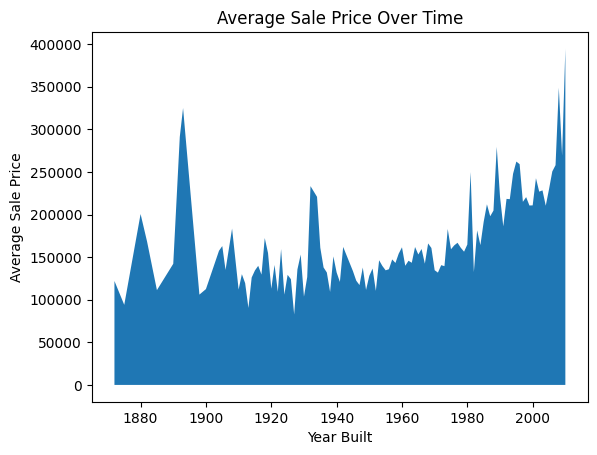

In [72]:
df_year = df.groupby("YearBuilt")["SalePrice"].mean()

plt.figure()
plt.fill_between(df_year.index, df_year.values)
plt.xlabel("Year Built")
plt.ylabel("Average Sale Price")
plt.title("Average Sale Price Over Time")
plt.show()


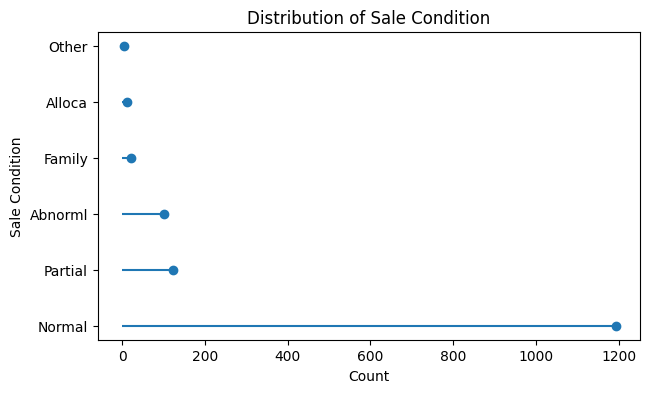

In [73]:
counts = df["SaleCondition"].value_counts()

plt.figure(figsize=(7,4))

# Stem lines
plt.hlines(
    y=counts.index,
    xmin=0,
    xmax=counts.values
)

# Dots
plt.plot(
    counts.values,
    counts.index,
    "o"
)

plt.xlabel("Count")
plt.ylabel("Sale Condition")
plt.title("Distribution of Sale Condition")

plt.show()


# Added some new plots for story telling (Ranjit)

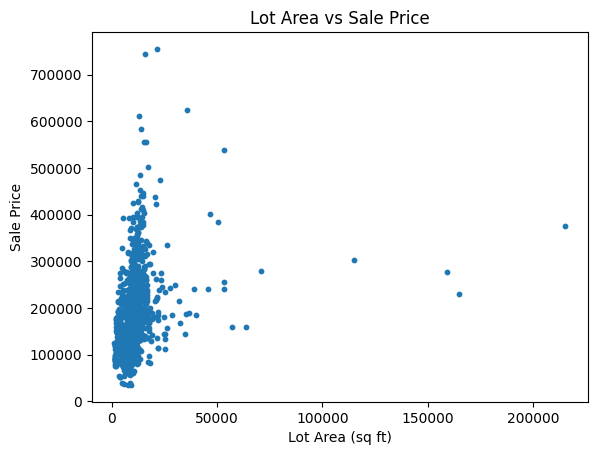

In [74]:
plt.figure()
plt.scatter(df["LotArea"], df["SalePrice"], s=10)
plt.xlabel("Lot Area (sq ft)")
plt.ylabel("Sale Price")
plt.title("Lot Area vs Sale Price")
plt.show()


##### While lot size may contribute to the price of some homes, most homes in Ames have smaller lot areas and are priced similarly. Larger lots are only associated with significantly higher prices in a small subset of homes.

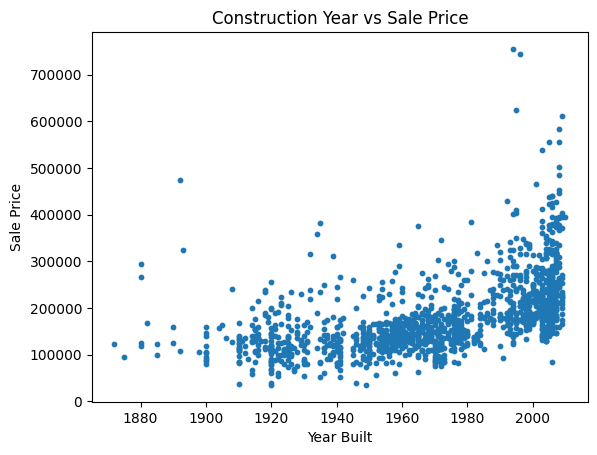

In [75]:
plt.figure()
plt.scatter(df["YearBuilt"], df["SalePrice"], s=10)
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.title("Construction Year vs Sale Price")
plt.show()


#### As shown in the chart, newer homes generally sell for higher prices. Homes built before the 1950s tend to have lower prices, while properties constructed after the 2000s show a sharp increase in value. This suggests that modern features, construction standards, and amenities are highly valued in today's real estate market.

<Figure size 640x480 with 0 Axes>

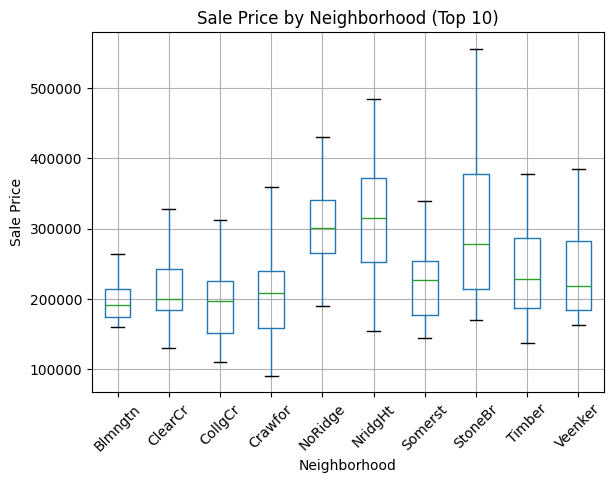

In [76]:
top_neigh = (
    df.groupby("Neighborhood")["SalePrice"]
      .median()
      .sort_values(ascending=False)
      .head(10)
      .index
)

plt.figure()
df[df["Neighborhood"].isin(top_neigh)].boxplot(
    column="SalePrice",
    by="Neighborhood",
    rot=45,
    showfliers=False
)
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.title("Sale Price by Neighborhood (Top 10)")
plt.suptitle("")
plt.show()


#### This chart displays how home prices vary across the top 10 neighborhoods in Ames. As seen, neighborhoods like NoRidge and NridgHt consistently have higher median sale prices, suggesting they are more desirable or feature more premium homes. On the other hand, neighborhoods like ClearCr and Blmngtn show a wider range of prices, with some lower-priced homes as well. If you're a buyer, these insights can help you understand where to expect higher or more variable prices based on the neighborhood.

<Figure size 640x480 with 0 Axes>

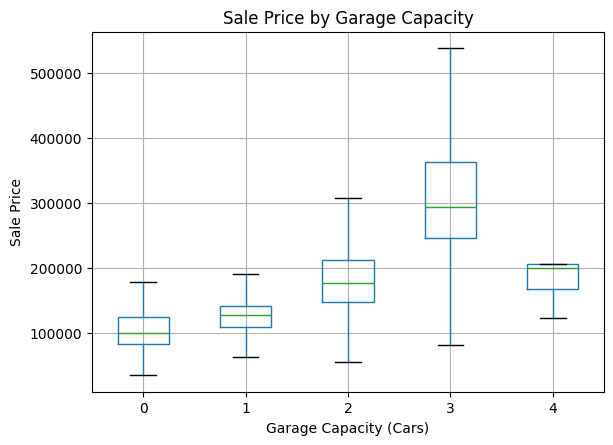

In [77]:
plt.figure()
df.boxplot(column="SalePrice", by="GarageCars",showfliers=False)
plt.xlabel("Garage Capacity (Cars)")
plt.ylabel("Sale Price")
plt.title("Sale Price by Garage Capacity")
plt.suptitle("")
plt.show()


#### Homes with more garage capacity tend to have higher prices, as expected. However, even homes with larger garages can vary widely in price depending on other factors such as overall quality and location. So while a bigger garage can increase value, it’s not the only feature driving price.

<Figure size 640x480 with 0 Axes>

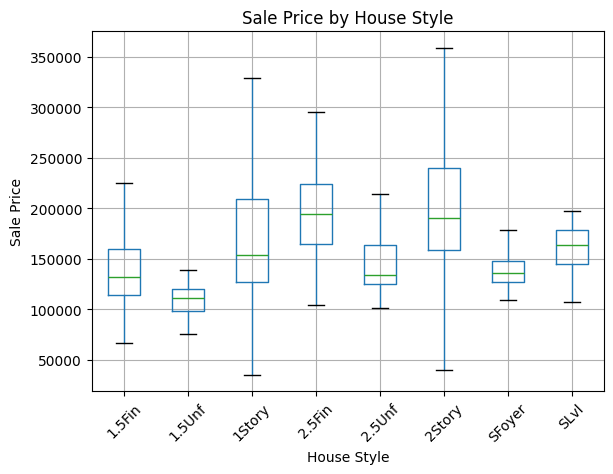

In [78]:
plt.figure()
df.boxplot(column="SalePrice", by="HouseStyle", rot=45,showfliers=False)
plt.xlabel("House Style")
plt.ylabel("Sale Price")
plt.title("Sale Price by House Style")
plt.suptitle("")
plt.show()


#####  The above plot shows that : House styles like "2Story" and "2.5Fin" have higher median prices, suggesting that they are typically larger homes or feature more developed spaces. On the other hand, styles like "1.5Unf" (unfinished) and "SFLvl" (split-level) have lower median prices, indicating they may be more affordable options or homes with unfinished areas. The "1Story" style, representing single-story homes, shows moderate pricing, typically appealing to buyers seeking more accessible living spaces.

<Figure size 800x600 with 0 Axes>

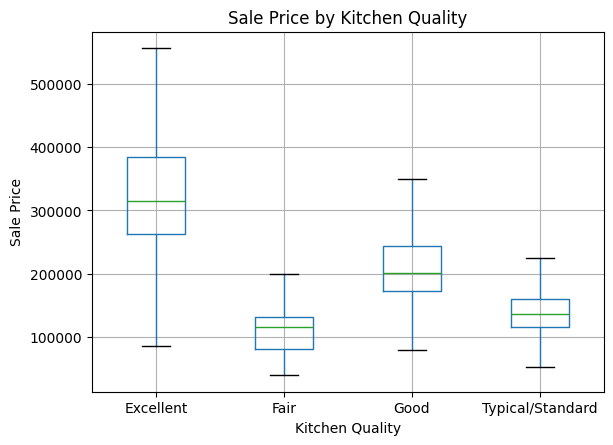

In [79]:
# Define the mapping of short codes to full names
kitchen_quality_mapping = {
    'Ex': 'Excellent',
    'Fa': 'Fair',
    'Gd': 'Good',
    'TA': 'Typical/Standard'
}

# Apply the mapping to the 'KitchenQual' column
df['KitchenQual'] = df['KitchenQual'].map(kitchen_quality_mapping)

# Create the boxplot
plt.figure(figsize=(8, 6))
df.boxplot(column="SalePrice", by="KitchenQual", showfliers=False)

# Labeling the plot
plt.xlabel("Kitchen Quality")
plt.ylabel("Sale Price")
plt.title("Sale Price by Kitchen Quality")
plt.suptitle("")  # Removes the default title added by boxplot

# Display the plot
plt.show()


##### Homes with higher kitchen quality (Excellent or Good) tend to command higher prices, while homes with Fair or Typical kitchens are priced lower. A high-quality kitchen is a key selling point for more expensive homes.

In [80]:
# Comment: Calculate mean SalePrice by Kitchen Quality
kitchen_price_mean = (
    df.groupby("KitchenQual")["SalePrice"]
    .mean()
    .sort_values(ascending=False)
)

kitchen_price_mean


KitchenQual
Excellent           327176.434343
Good                212273.298791
Typical/Standard    139879.866485
Fair                105565.205128
Name: SalePrice, dtype: float64

<Figure size 800x600 with 0 Axes>

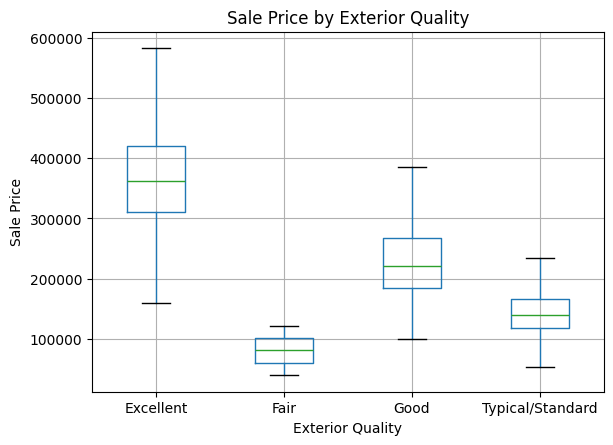

In [81]:
Exterior_quality_mapping = {
    'Ex': 'Excellent',
    'Fa': 'Fair',
    'Gd': 'Good',
    'TA': 'Typical/Standard'
}

# Apply the mapping to the 'KitchenQual' column
df['ExterQual'] = df['ExterQual'].map(Exterior_quality_mapping)

# Create the boxplot
plt.figure(figsize=(8, 6))

df.boxplot(column="SalePrice", by="ExterQual",showfliers=False)
plt.xlabel("Exterior Quality")
plt.ylabel("Sale Price")
plt.title("Sale Price by Exterior Quality")
plt.suptitle("")
plt.show()


#### Homes with higher exterior quality tend to command higher prices, with excellent exterior finishes resulting in a notable price increase. Homes with fair or typical exterior quality are more affordable, but buyers may need to consider renovation or improvement costs.

In [82]:
# Comment: Calculate mean SalePrice by Exterior Quality
exterior_price_mean = (
    df.groupby("ExterQual")["SalePrice"]
    .mean()
    .sort_values(ascending=False)
)

exterior_price_mean


ExterQual
Excellent           365446.470588
Good                232038.002079
Typical/Standard    144315.723757
Fair                 87985.214286
Name: SalePrice, dtype: float64